In [56]:
%matplotlib inline 
#from __future__ import division
import __future__
import warnings
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

# Zadanie na 3.0

In [42]:
dt = io.imread('http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot00.jpg', as_gray=True)

numpy.ndarray

In [867]:
from skimage.feature import canny
czar = filters.sobel(dt)

In [868]:
czar_2 = mp.erosion(mp.dilation(czar))

In [869]:
czar_3 = mp.erosion(mp.dilation(czar_2))

In [870]:
czar_4 = (mp.dilation(czar_3))

In [871]:
czar_5 = (mp.dilation(czar_4))

In [872]:
czar_6 = (mp.dilation(czar))

In [873]:
czar_7 = (mp.dilation(czar_6))

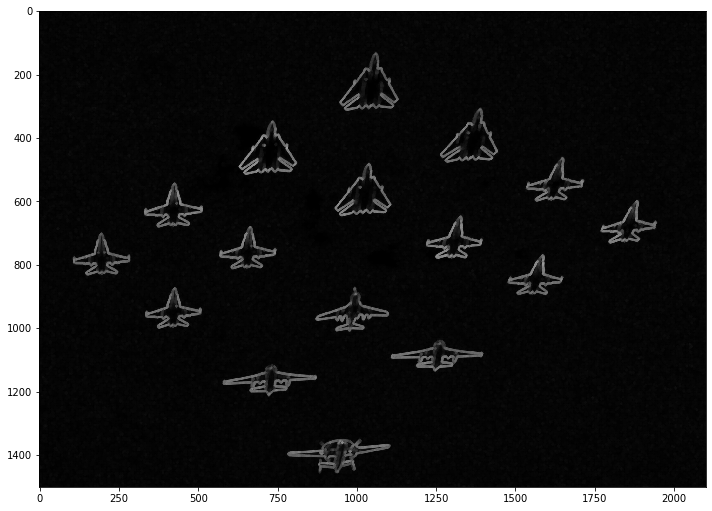

In [874]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
czar_8 = (mp.dilation(czar_7))
io.imshow(czar_8, cmap=plt.cm.gray)

# Zadanie na 5.0

In [883]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output_2.pdf")

In [307]:
planes = ['http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot00.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot01.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot02.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot03.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot04.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot05.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot06.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot07.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot08.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot09.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot10.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot11.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot12.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot13.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot14.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot15.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot16.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot17.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot18.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot19.jpg',
         'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot20.jpg']

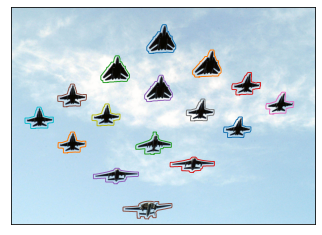

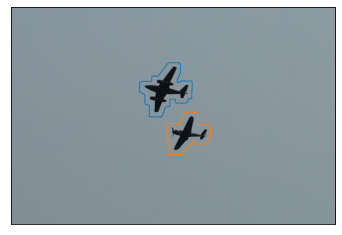

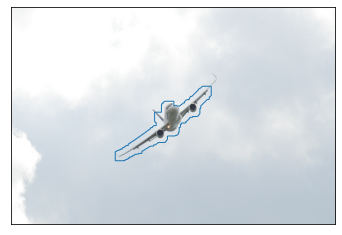

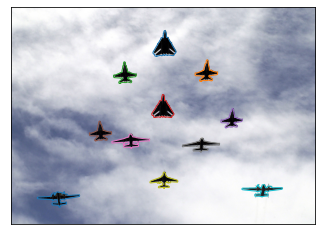

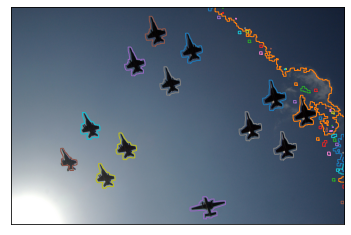

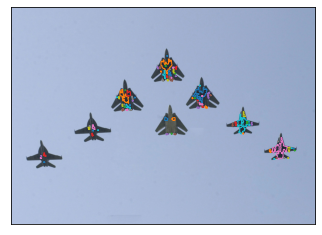

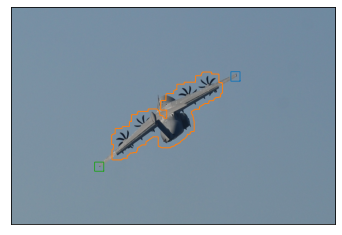

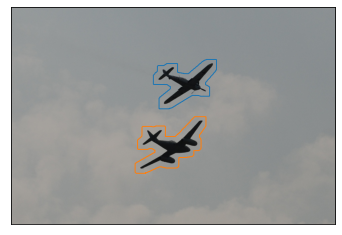

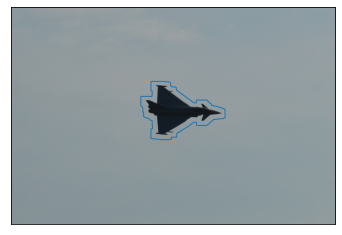

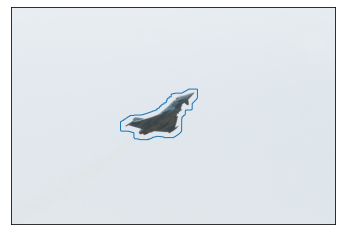

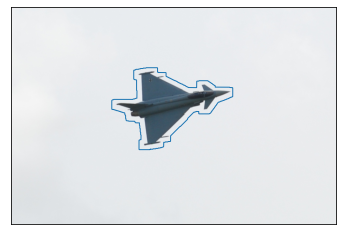

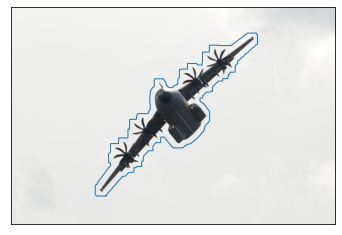

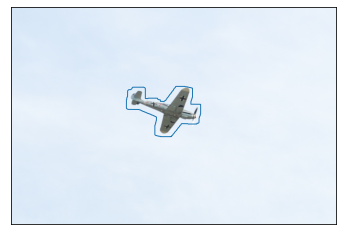

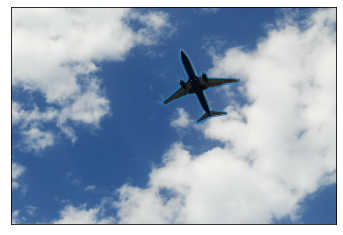

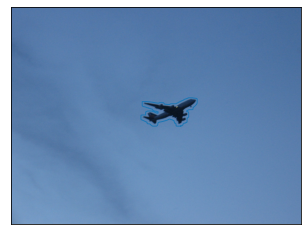

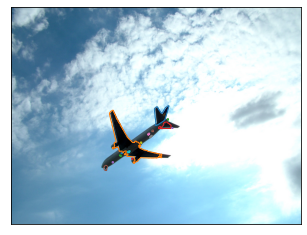

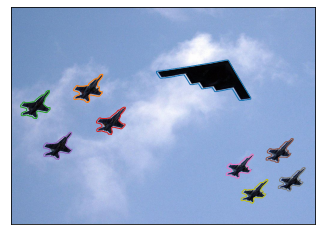

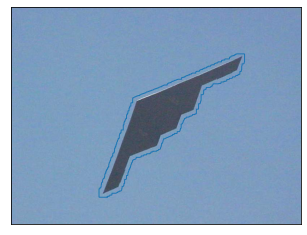

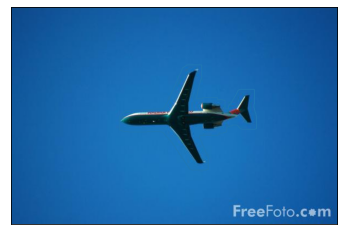

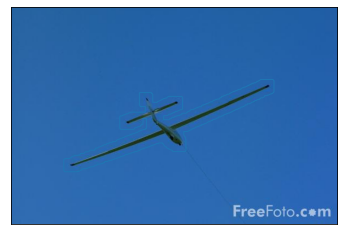

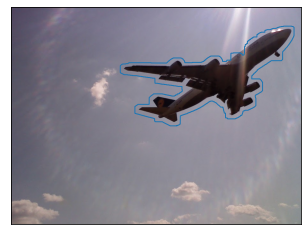

In [884]:
j = 0
for plane in planes:
    if j > -1:
        image = io.imread(plane, as_gray=True)
        if(image.mean() < 0.35):
            th = (1 - (1 - image.mean()))/2
            e = 29
        elif(image.mean() < 0.61):
            th = (1 - (1 - image.mean()))/2
            e = 27
        elif(image.mean() > 0.8):
            th = (1 - (1 - image.mean()))/2
            e = 27
        else:
            th = (1 - image.mean())/2
            e = 10
        bw = image > th
        bw = mp.dilation(mp.erosion(bw, mp.square(e)), mp.square(6))
        # Construct some test data
        r = bw
        # Find contours at a constant value of 0.8
        contours = measure.find_contours(r, 0.8)

        # Display the image and plot all contours found
        fig, ax = plt.subplots()
        ax.imshow(r, cmap=plt.cm.gray)
        org_image = io.imread(plane)
        ax.imshow(org_image)

        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
        pdf.savefig(fig, dpi=150)
    j += 1
pdf.close()

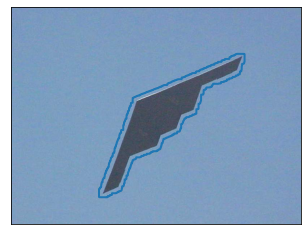

In [882]:
    image = io.imread(planes[17], as_gray=True)
    bw = image > (1-(1-image.mean()))/2
    bw = mp.dilation(mp.erosion(bw, mp.square(27)), mp.square(6))
    #bw = (mp.dilation(bw))
    # Construct some test data
    r = bw
    # Find contours at a constant value of 0.8
    contours = measure.find_contours(r, 0.8)

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    #ax.imshow(r, cmap=plt.cm.gray)
    org_image = io.imread(planes[17])
    ax.imshow(org_image)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    fig.savefig('samolot' + str(j) + '.pdf', dpi=150)

In [885]:
1, 4, 5, 6, 7, 8, 13, 14, 16, 17, 19, 20

(1, 4, 5, 6, 7, 8, 13, 14, 16, 17, 19, 20)